# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is here: https://raw.githubusercontent.com/dlsun/data-science-book/master/data/KarpickeBlunt2011Replication/data.csv.
- The codebook (explaining what the variables mean) is here: https://raw.githubusercontent.com/dlsun/data-science-book/master/data/KarpickeBlunt2011Replication/codebook.csv.

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dlsun/data-science-book/master/data/KarpickeBlunt2011Replication/data.csv")
df.head()

,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,...,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,...,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later. 

Condition
Concept      AxesSubplot(0.125,0.125;0.775x0.755)
Retrieval    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PR.2, dtype: object

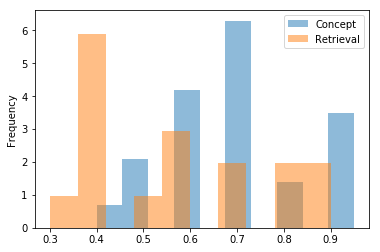

In [3]:
df.groupby("Condition")["PR.2"].plot.hist(alpha=0.5, legend=True, density=True)

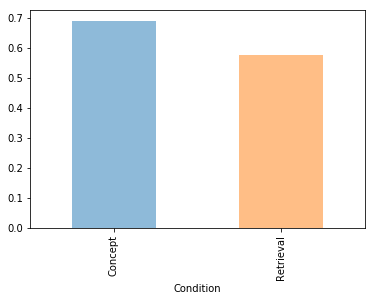

In [4]:
df.groupby("Condition")["PR.2"].mean().plot.bar(alpha=0.5)

The retrieval group appeared to actually feel less prepared than the concept group. We can see that the mean preparedness for the concept memory group was approximately (0.69), while the mean preparedness for the retrieval memory goup was approximately (0.576)

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

Condition
Concept      AxesSubplot(0.125,0.125;0.775x0.755)
Retrieval    AxesSubplot(0.125,0.125;0.775x0.755)
Name: TS.avg, dtype: object

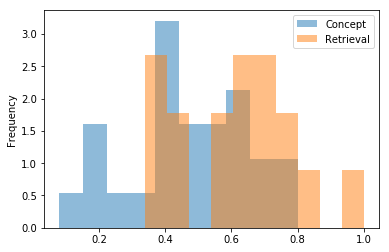

In [5]:
df.groupby("Condition")["TS.avg"].plot.hist(alpha=0.5, legend=True, density=True)

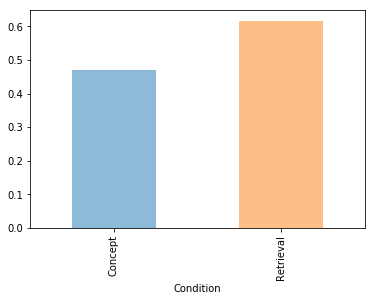

In [6]:
df.groupby("Condition")["TS.avg"].mean().plot.bar(alpha=0.5)

I decided to use the variable "TS.avg" to evaluate the subjects actual performance on the cognition test, seeing how it was the avg of the two tests they took ("TS.1" and "TS.2").

The retrieval group actually performed approximately 15% better than the concept group. More specifically, the mean performance for the retrieval group was approximately (0.616), while the mean performance for the concept group was approximately (0.469)

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

Condition
Concept      AxesSubplot(0.125,0.125;0.775x0.755)
Retrieval    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Perf-Pred, dtype: object

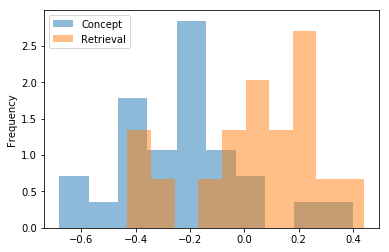

In [7]:
df["Perf-Pred"] = df["TS.avg"] - df["PR.2"]
df.groupby("Condition")["Perf-Pred"].plot.hist(alpha=0.5, density=True, legend=True)

The retrieval group appeared to perform much better than they expected as evident by the greater proportion of retrieval members on the positive side of the x-axis. However, the concept group did not appear to do as well as they predicted, with the majority of the group having a negative (Performance - Prediction) score

# Question 4

This was a completely randomized experiment. This means that the condition that each subject was assigned to should be independent of their gender, age, and any other subject characteristics. Does that seem to be true in this case? Calculate a summary measure and/or make a visualization, and explain what you see.

Condition
Concept      AxesSubplot(0.125,0.125;0.775x0.755)
Retrieval    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

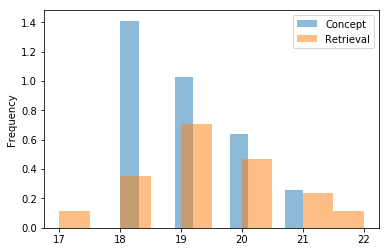

In [8]:
df.groupby("Condition")["Age"].plot.hist(alpha=0.5, density=True, legend=True)


In [9]:
df.groupby("Condition")["Gender"].value_counts().to_frame()

Gender
Condition Gender        
Concept   Male        17
          Female       9
Retrieval Female      12
          Male         5

The retrieval group has a roughly normal age distribution, while the concept group seems to be skewed right (more young than old). In addition to this, the concept group has roughly half the number of females to males, while the retrieval group

# Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.
2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)
3. Upload the PDF [to PolyLearn](https://polylearn.calpoly.edu/AY_2018-2019/mod/assign/view.php?id=313950).